In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import h5py
import glob

import astrophot as ap


from mockobservation_tools.galaxy_tools import ParamsFromPath

%matplotlib inline


Missing firefly, obtain it at http://github.com/ageller/Firefly or pip install firefly.


AstroPhot is a great tool for measuring images\
https://astrophot.readthedocs.io/en/latest/

They have some great examples on their website, however here is an example of how I use it on my images

In [2]:
# Read in an image
#collect all of the image files from the directory

savedirectory = 'Figures/'

images_files = glob.glob(savedirectory + "*.hdf5")
images_files



['Figures/sim_host_ugrband_FOV25_p500.hdf5']

In [3]:
file = h5py.File(images_files[0], 'r')

rband_image = file['projection_xy']['band_r'][:]

In [4]:
galaxyID, FOV, pixel = ParamsFromPath(images_files[0], typeint=False) # this only works if you use my file naming 
print(FOV)
print(pixel)

pixelScale = 2 * int(FOV) / int(pixel)   #Kpc/pixel

25
500


### This is how you execute a fit

Please look at the astrophot documentation for more models and methods of fitting



In [5]:
# this set of our image at the image we are fitting 
target = ap.image.Target_Image(data=rband_image,pixelscale=1) 
#pixelscale = 1 (arc/pixel) makes units easy at the end

#This set up how we are modeling the galaxies
#You can name it anything
#we are using a sersic model
#and you can put extra contraints on the sersic fit
model = ap.models.AstroPhot_Model(
    name="model with target",
    model_type="sersic galaxy model", 
   # parameters={"n": {"value": [1], "limits": [.99, 1.01]} } , # you can put contraints on fitting parameters
    target=target)

#This sets up a defualt sersic
model.initialize()

#This actually fits the sersic to the target image
result = ap.fit.LM(model).fit()

#Theres are the out put measured sersic fit
b_a = model.parameters['q'].value.numpy()
PA  = model.parameters['PA'].value.numpy()
n   = model.parameters['n'].value.numpy()
#In observations Re is in units arcsec, this out put is actually just Number of pixels so we convert it to kpc 
Re  = model.parameters['Re'].value.numpy() * pixelScale # Converts the units to kpc based on image 
Ie  = model.parameters['Ie'].value.numpy() 



[W324 17:14:08.435444923 NNPACK.cpp:61] Could not initialize NNPACK! Reason: Unsupported hardware.


In [6]:
#Again note the Re is actually in units of pixels
# The errors are not very helpful
model.parameters


model with target (id-139972232887664, branch node):
  center (id-139975634940464): [249.19497211638108, 250.48953593020963] +- [0.1, 0.1] [arcsec]
  q (id-139972234278144): 0.7280642865120629 +- 0.03 [b/a], limits: (0.0, 1.0)
  PA (id-139972216999040): 2.3873210509334726 +- 0.06 [radians], limits: (0.0, 3.141592653589793), cyclic
  n (id-139972216794256): 0.9833681466343068 +- 0.05 [none], limits: (0.36, 8.0)
  Re (id-139972216790800): 21.707623139940956 +- 22.265220117332465 [arcsec], limits: (0.0, None)
  Ie (id-139972216789408): 7.088610766268143 +- 1.3499038199996396 [log10(flux/arcsec^2)]

### There are some extra fuctions you can use in astrophot

Note that the images look flipped because imshow goes from 0-500 from top to bottom\
Astophot's plots do 500-0 from top to bottom

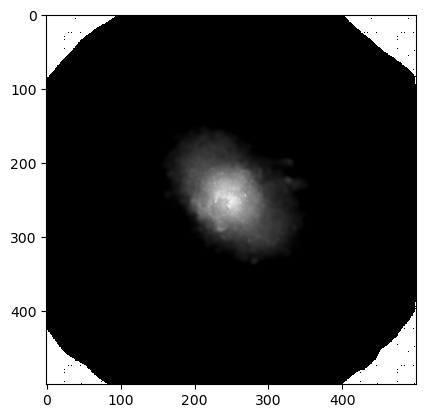

In [7]:
plt.imshow(rband_image , cmap='grey', norm=LogNorm(vmin=1e5, vmax=1e8))
plt.show()

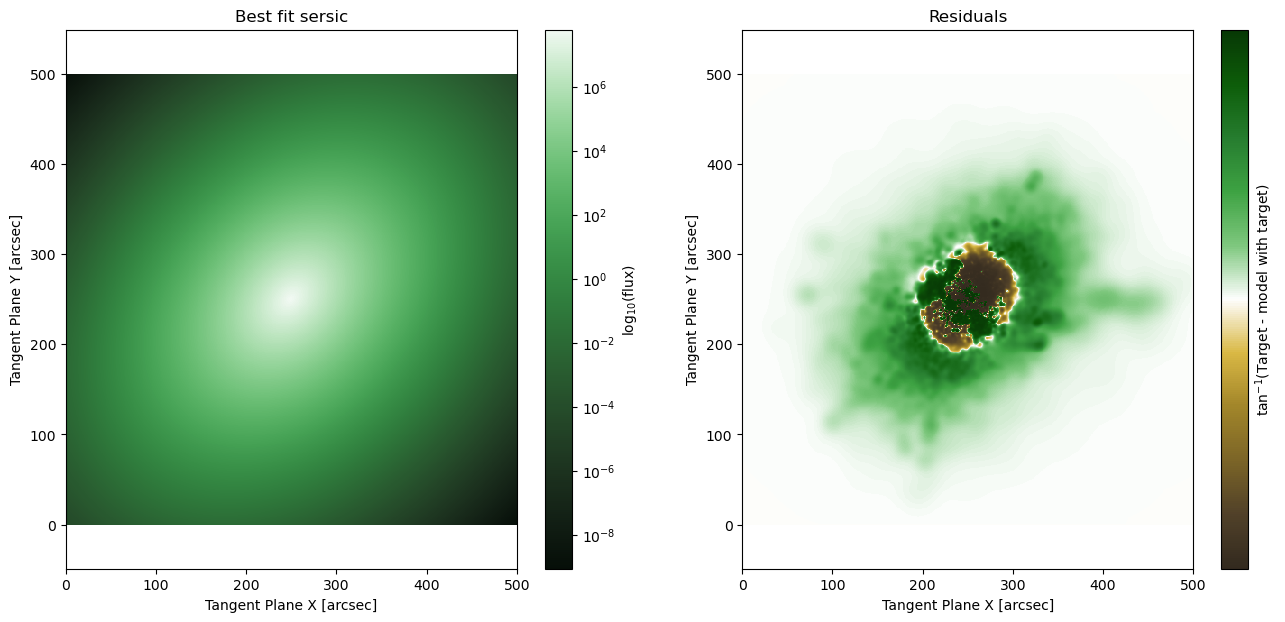

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(16, 7))
ax[0].set_title('Best fit sersic')
ap.plots.model_image(fig, ax[0], model)
ax[1].set_title('Residuals')
ap.plots.residual_image(fig, ax[1], model)
plt.show()

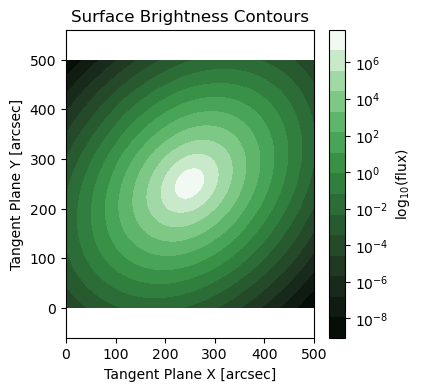

In [9]:
fig, ax = plt.subplots(figsize=(4, 4))
ap.plots.model_image(fig, ax, model, cmap_levels=15)
ax.set_title('Surface Brightness Contours')

plt.show()